In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [101]:
path = r"F:\DATASET\homicide_by_countries.csv"
hom = pd.read_csv(path)
hom

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [3]:
hom.Region.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [4]:
hom.Subregion.unique()

array(['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Australia, New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Northern America',
       'Southern Africa', 'South-Eastern Asia', 'Eastern Africa',
       'Northern Europe', 'Eastern Asia', 'Central Asia'], dtype=object)

In [193]:
hom.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [20]:
hom.dtypes

Location     object
Region       object
Subregion    object
Rate          int32
Count         int32
Year          int32
dtype: object

In [21]:
hom['Rate'] = hom['Rate'].astype(int)

In [49]:
hom.loc[26]

Location            Brazil
Region            Americas
Subregion    South America
Rate                    22
Count                47722
Year                  2020
Name: 26, dtype: object

In [19]:
vc= ['Rate', 'Count', 'Year']
for c in vc:
    print (c)
    hom[c] = hom[c]. astype(int)

Rate
Count
Year


In [26]:
hom_1 = hom.sort_values('Count', ascending = False)
hom_1.head()

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,Americas,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,Americas,Central America,28,36579,2020
186,United States,Americas,Northern America,6,21570,2020


In [85]:
hom_11 = hom_1[['Location','Count']]
hom_11.head()

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


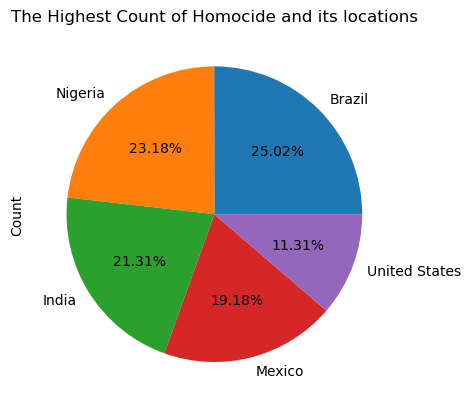

In [51]:
hom_11.head().plot(x = 'Location', y = 'Count', kind = 'pie' , labels = hom_11.Location, autopct= '%1.2f%%');
plt.legend().set_visible(False);
plt.title('The Highest Count of Homocide and its locations');

In [57]:
hom_2 = hom.groupby('Region')['Count'].sum().sort_values(ascending = False)
hom_2

Region
Americas    153597
Asia        105552
Africa       99481
Europe       19869
Oceania        347
Name: Count, dtype: int32

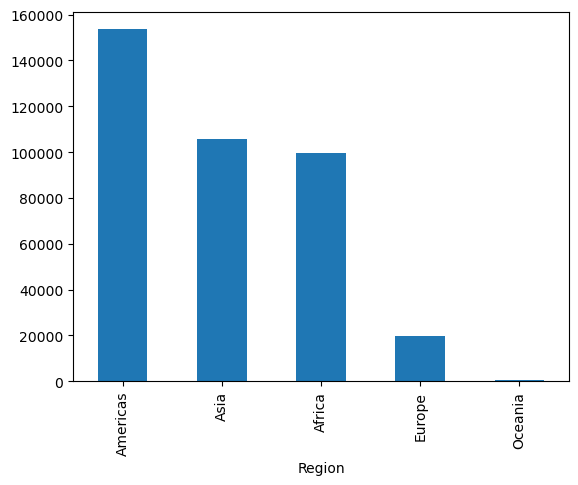

In [91]:
hom_2.plot(kind = 'bar');
plt.title('');

In [100]:
hom

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 190     True
 191    False
 192    False
 193    False
 194    False
 Name: Region, Length: 195, dtype: bool]

In [64]:
hom_3 = hom.groupby('Subregion')['Count'].sum().sort_values(ascending = False)
hom_3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int32

In [65]:
hom_3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [66]:
hom_3.index

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347])

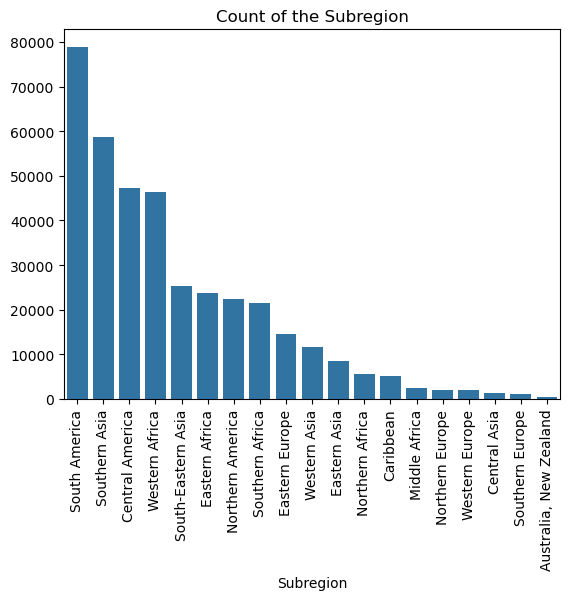

In [194]:
#hom_3.plot(x='hom_3.index', y = 'hom_3.index' , kind = 'bar'  );
sns.barplot(x=hom_3.index, y = hom_3.values);
plt.xticks(rotation = 'vertical');
plt.title('Count of the Subregion');

In [102]:
hom

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [111]:
hom.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [150]:
hom_4 = hom[(hom['Region'] == 'Asia') |  (hom['Region'] =='Europe')]
hom_4

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
8,Armenia,Asia,Western Asia,1.8,52,2020
11,Austria,Europe,Western Europe,0.7,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0.7,64,2019
184,United Kingdom,Europe,Northern Europe,1.1,755,2018
189,Uzbekistan,Asia,Central Asia,1.2,396,2019
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011


In [161]:
hom_4 = hom_4[hom_4.Year > 2016] [['Region', 'Year', 'Count']]

hom_4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [164]:
hom_4 =hom_4.groupby(['Region', 'Year']).sum()['Count']
hom_4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [165]:
hom_41 = hom_4.unstack(level = 0)
hom_41

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


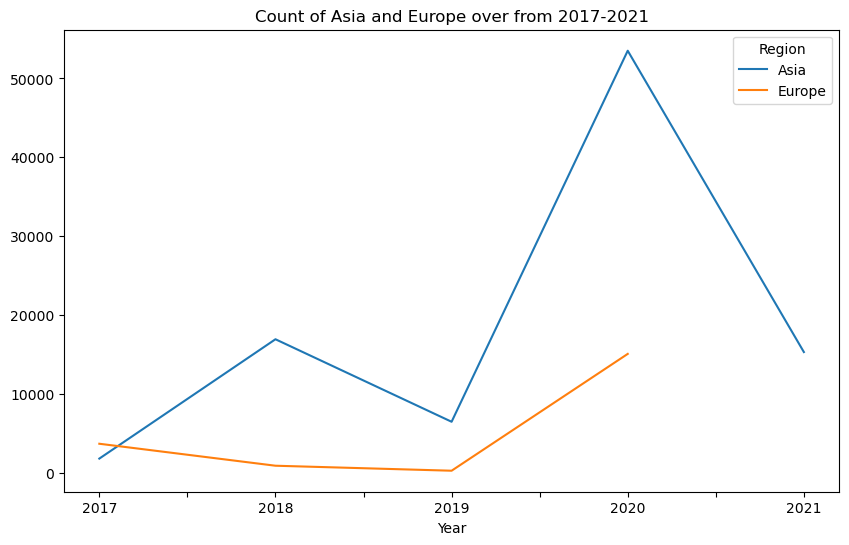

In [179]:
hom_41.plot(kind = 'line', figsize = (10,6));
plt.xlabel = ('Years');
plt.ylabel = ('Count');
plt.title('Count of Asia and Europe over from 2017-2021');

In [174]:
hom_41.index = hom_41.index.astype(int).astype(str)

In [184]:
hom_5 = hom.groupby(['Year']) ['Rate'].sum().sort_values(ascending = False)
hom_5

Year
2020    608.0
2019    161.0
2012    119.5
2016     78.8
2018     70.0
2015     58.5
2014     54.2
2009     39.5
2017     30.3
2021     28.4
2013     21.7
2007     19.0
2010     18.2
2006     12.5
2011     10.1
2008      5.1
Name: Rate, dtype: float64

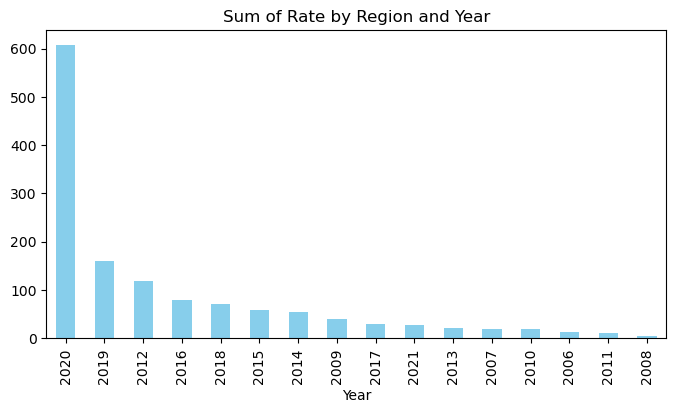

In [191]:
hom_5.plot(kind = 'bar', figsize = (8,4), color = 'skyblue');
plt.xlabel = ('Region,Year');
plt.ylabel = ('Sum of Rate');
plt.title('Sum of Rate by Region and Year');